In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('HousePrices.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

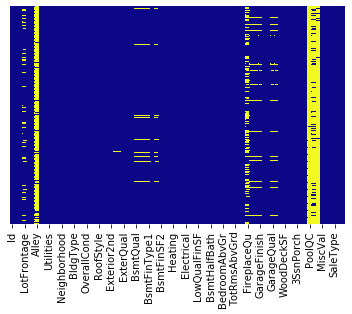

In [5]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')

In [6]:
dflist=['Id','Alley','PoolQC','MiscFeature','Fence','FireplaceQu']
df.drop(dflist,axis=1,inplace=True)

In [7]:
mod=['GarageQual','LotFrontage','MasVnrType','MasVnrArea','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','Electrical','GarageType','GarageYrBlt','GarageFinish','GarageCond']
for features in mod:
    df[features]=df[features].fillna(df[features].mode()[0])

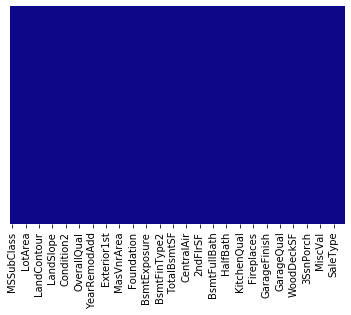

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='plasma')


In [9]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [10]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for features in columns:
    df[features]=le.fit_transform(df[features].astype(str))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 75 columns):
MSSubClass       1460 non-null int64
MSZoning         1460 non-null int32
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null int32
LotShape         1460 non-null int32
LandContour      1460 non-null int32
Utilities        1460 non-null int32
LotConfig        1460 non-null int32
LandSlope        1460 non-null int32
Neighborhood     1460 non-null int32
Condition1       1460 non-null int32
Condition2       1460 non-null int32
BldgType         1460 non-null int32
HouseStyle       1460 non-null int32
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null int32
RoofMatl         1460 non-null int32
Exterior1st      1460 non-null int32
Exterior2nd      1460 non-null int32
MasVnrType       1460 non-null int32
Mas

In [11]:
x=df.drop('SalePrice',axis=1).values
y=df['SalePrice'].values

In [12]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [13]:
y = y.reshape(-1,1)
y.shape


(1460, 1)

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
multiple=LinearRegression()
multiple.fit(x_train,y_train)

LinearRegression()

In [17]:
predictions=multiple.predict(x_test)
predictions

array([[149872.1927593],
       [327936.1927593],
       [110628.1927593],
       [180920.1927593],
       [322496.1927593],
       [ 64552.1927593],
       [238248.1927593],
       [150036.1927593],
       [ 68656.1927593],
       [153832.1927593],
       [152072.1927593],
       [113760.1927593],
       [ 76816.1927593],
       [210576.1927593],
       [171616.1927593],
       [136688.1927593],
       [210432.1927593],
       [115120.1927593],
       [110560.1927593],
       [230992.1927593],
       [141752.1927593],
       [211936.1927593],
       [189864.1927593],
       [125056.1927593],
       [218244.1927593],
       [157154.1927593],
       [211496.1927593],
       [ 72572.1927593],
       [165872.1927593],
       [194568.1927593],
       [171792.1927593],
       [255448.1927593],
       [193824.1927593],
       [ 95420.1927593],
       [259744.1927593],
       [141248.1927593],
       [134288.1927593],
       [214912.1927593],
       [291968.1927593],
       [ 94416.1927593],


In [19]:
from sklearn.metrics import r2_score
score=r2_score(y_test,predictions)
score

0.8438591373901172

In [23]:
print(y_test)

[[154500]
 [325000]
 [115000]
 [159000]
 [315500]
 [ 75500]
 [311500]
 [146000]
 [ 84500]
 [135500]
 [145000]
 [130000]
 [ 81000]
 [214000]
 [181000]
 [134500]
 [183500]
 [135000]
 [118400]
 [226000]
 [155000]
 [210000]
 [173500]
 [129000]
 [192000]
 [153900]
 [181134]
 [141000]
 [181000]
 [208900]
 [127000]
 [284000]
 [200500]
 [135750]
 [255000]
 [140000]
 [138000]
 [219500]
 [310000]
 [ 97000]
 [114500]
 [205000]
 [119500]
 [253293]
 [128500]
 [117500]
 [115000]
 [127000]
 [451950]
 [144000]
 [119000]
 [196000]
 [115000]
 [287000]
 [144500]
 [260000]
 [213000]
 [175000]
 [107000]
 [107500]
 [ 68500]
 [154000]
 [317000]
 [264132]
 [283463]
 [243000]
 [109000]
 [305000]
 [ 93500]
 [176000]
 [118858]
 [134000]
 [109008]
 [ 93500]
 [611657]
 [173000]
 [348000]
 [341000]
 [141000]
 [124900]
 [118000]
 [ 67000]
 [113000]
 [ 91300]
 [149500]
 [133000]
 [266000]
 [190000]
 [155900]
 [155835]
 [153500]
 [152000]
 [124500]
 [301000]
 [136500]
 [169990]
 [205000]
 [183900]
 [204900]
 [260000]


<function matplotlib.pyplot.show(*args, **kw)>

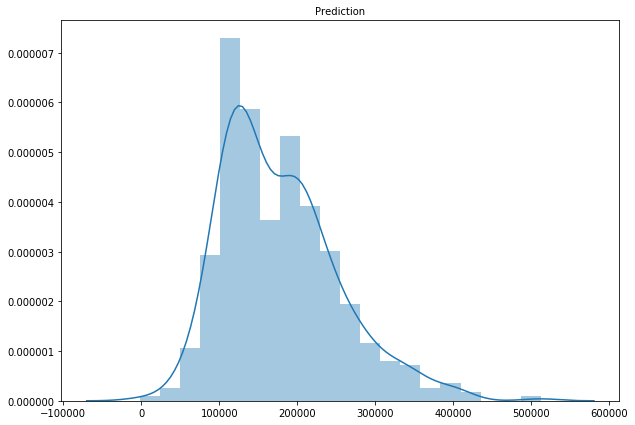

In [29]:
plt.figure(figsize=(10,7))
plt.title("Prediction",fontsize =10)
sns.distplot(predictions)
plt.show 

<function matplotlib.pyplot.show(*args, **kw)>

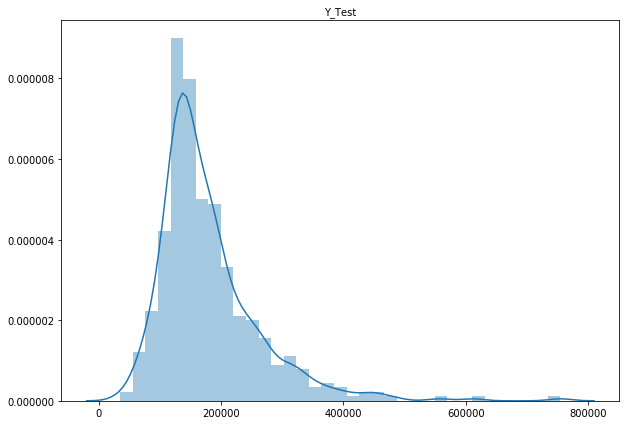

In [30]:
plt.figure(figsize=(10,7))
plt.title("Y_Test",fontsize =10)
sns.distplot(y_test)
plt.show 